In [1]:
import Pkg; Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Project.toml`
  No Changes to `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Manifest.toml`


In [2]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra
using RSGraphics
using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [3]:
# Testing function for making hadamard matrices using Sylvester's construction
function hadamard_gen_TEST(n::Int)
    if !(n % 4 == 0 || n == 1 || n == 2)
        throw("argument must be divisible by 4 (or equal to 1 or 2)")
    end
    k = log(2,n)
    global H = [1]
    for i in 1:k
        r1 = hcat(H,H)
        r2 = hcat(H,-1 .* H)
        H_n = vcat(r1,r2)
        H = H_n
    end
    
    return H
end

hadamard_gen_TEST (generic function with 1 method)

In [4]:
println(Integer(log(16)/log(2)))

t = @elapsed had = hadamard_gen_TEST(1024)

println(t)
#=
pretty_table(had)
s_1 = 4
s_2 = 4
ims = []
for r in eachrow(had)
    i = reshape(r,s_1,s_2)
    push!(ims, i)
    #pretty_table(i)
end
println(length(ims)) =#

4
0.612140291


In [5]:
# uses hadamard_gen to make lists of images
function orthogonal_image_generator(n::Int)::Vector{Matrix{Int64}}
    had = hadamard_gen(n)
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end

function orthogonal_image_generator(hada::Matrix)::Vector{Matrix{Int64}}
    had = hada
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end



orthogonal_image_generator (generic function with 2 methods)

In [6]:
images = Dict(
    "i1"  => [
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
    ],
    
    "i2" => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
    ],
    
    "i3"  => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
    ],
    
    "i4" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i5" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i6" => [
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
    ] 
    
)

Dict{String, Matrix{Int64}} with 6 entries:
  "i5" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i4" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i3" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; 1 1 … -1 -1]
  "i1" => [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]
  "i2" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i6" => [1 1 … -1 -1; -1 -1 … 1 1; … ; -1 -1 … 1 1; 1 1 … -1 -1]

In [22]:
sim_time = 4
steps = 3000
im_all = orthogonal_image_generator(64)
im_all_vec = vec.(im_all)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:4] #random
for t in sl
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))
@show length(parameters["images"])
 m = filter(x -> !(x in sl), 1:64)
@show m
 f = filter(x -> x in sl, 1:64)
@show f

64
4
length(parameters["images"]) = 4
m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64]
f = [10, 38, 51, 57]


4-element Vector{Int64}:
 10
 38
 51
 57

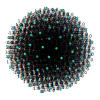

In [8]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [9]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))
@show sum(abs.(weights(graph)))

true
1.0
-1.0
sum(abs.(weights(graph))) = 4032.0


4032.0

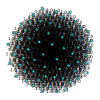

In [10]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [31]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))

true
1.0
-1.0


In [41]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len16_t4")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │
│      1 │      1 │     -1 │      1 │     -1 │      1 │      1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │
│     -1 │      1 │      1 │     -1 │      1 │     -1 │     -1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│      1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │
│     -1 │      1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len16_t4.dat is generated


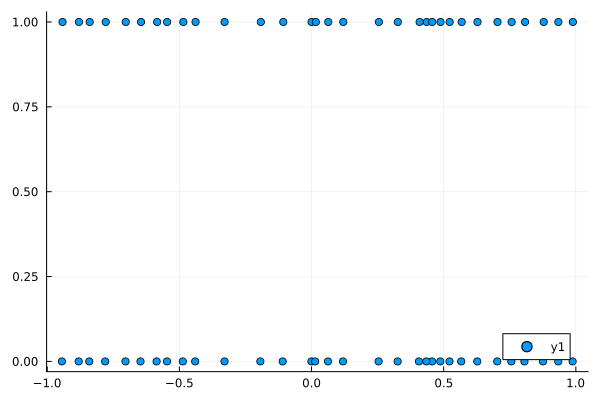

In [42]:
# Graphing
    rot = iterative_rotater_state(res[1],parameters)
    g = get_HN_graph(parameters["images"],parameters["scaling"])
    binary = [i[1] for i in rot]
    x = res[1][2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)

In [43]:
sol_finder(res[1], parameters)

Any[]

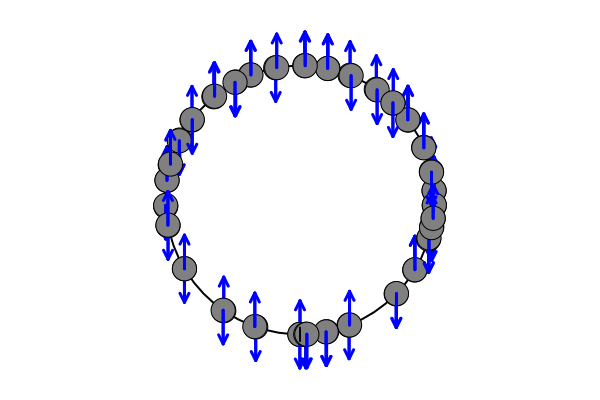

In [44]:
show_state(res[1][1],res[1][2])

In [49]:
# Gives the points on the graph
function HN_cut_plotter_TEST(params, state, debug = false)
    rot = iterative_rotater_state(state,params)
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = Plots.scatter(x,y)
    if debug
        x_p = p[1][1][:x]
        y_p = p[1][1][:y]
        o = sortperm(y_p)
        x_sorted = x_p[o]
        y_sorted = y_p[o]
        for i in 1:length(x_p)
            println("($(x_sorted[i]),$(y_sorted[i]))")
        end
    end
    return (p, x_sorted, y_sorted)
end

HN_cut_plotter_TEST (generic function with 2 methods)

(0.4871053512187268,0.0)
(0.2538744019419878,0.0)
(0.32571364787540186,0.0)
(0.7026129465173464,0.0)
(-0.0003991762480815195,0.0)
(0.11900618601049125,0.0)
(-0.3292199557030377,0.0)
(0.8055015649048163,0.0)
(-0.6471691881640699,0.0)
(0.9334956431028307,0.0)
(0.5219573034652814,0.0)
(0.4559980714534325,0.0)
(0.8758264120356614,0.0)
(0.6269855408506884,0.0)
(-0.5468904854860742,0.0)
(0.06224836651436531,0.0)
(-0.8411020573381591,0.0)
(0.7559443283519575,0.0)
(-0.19371881495807838,0.0)
(-0.7807850901375951,0.0)
(0.5663396736096491,0.0)
(-0.9445826016520666,0.0)
(-0.5862051785000056,0.0)
(0.40632296988927263,0.0)
(0.013605325707480187,0.0)
(-0.8810246051853414,0.0)
(-0.48715694013007327,0.0)
(-0.44024106329782425,0.0)
(-0.10909267957256122,0.0)
(-0.7040176504038891,0.0)
(0.9877524986776759,0.0)
(0.4341712665814177,0.0)
(0.0,1.0)
(-0.879972430500665,1.0)
(-0.7786775165249622,1.0)
(-0.1919228998942797,1.0)
(0.8784829967703705,1.0)
(0.6278650751826758,1.0)
(0.5679976986990363,1.0)
(-0.4388506

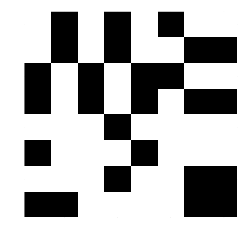

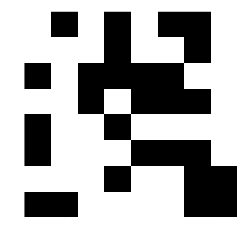

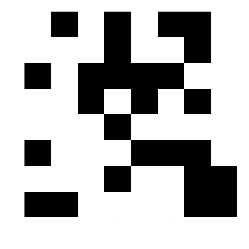

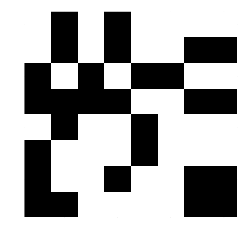

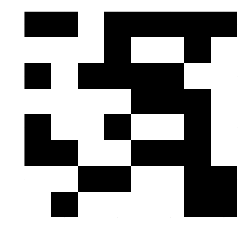

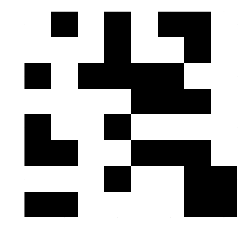

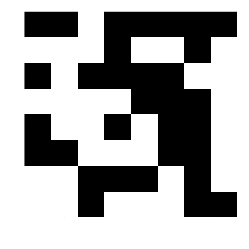

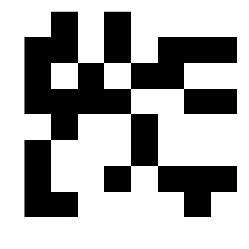

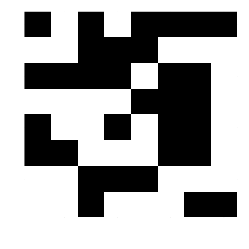

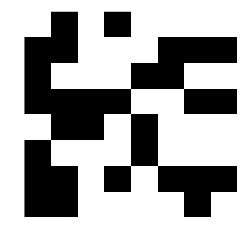

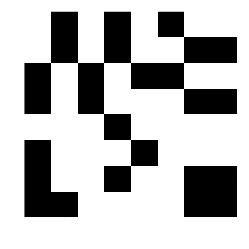

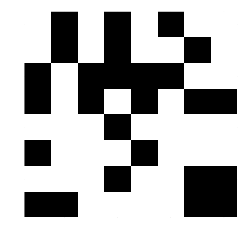

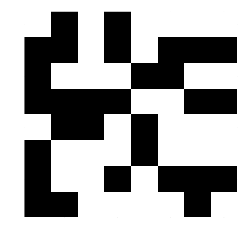

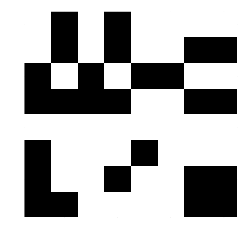

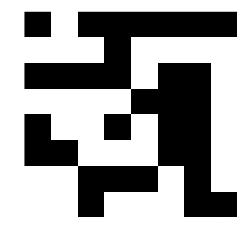

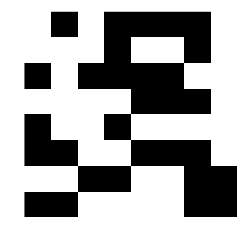

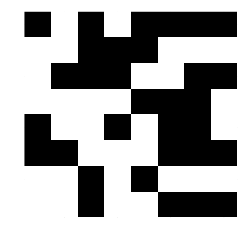

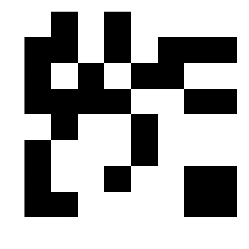

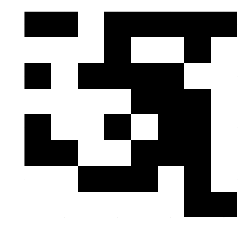

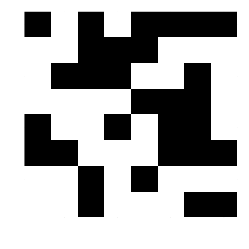

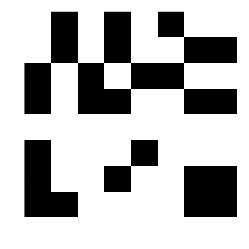

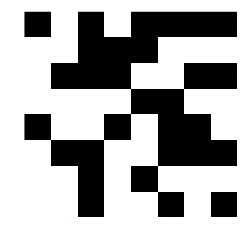

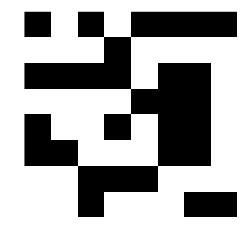

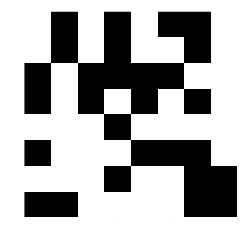

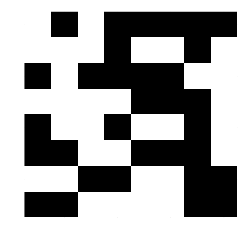

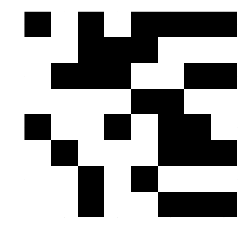

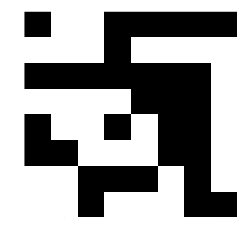

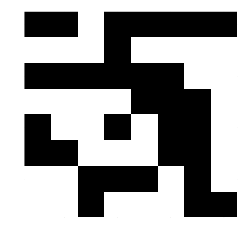

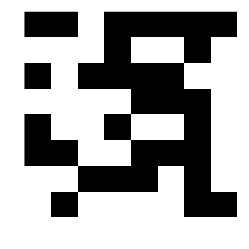

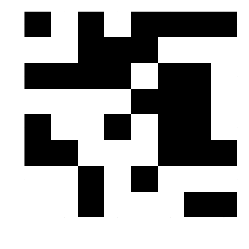

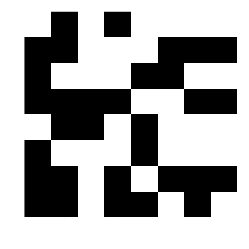

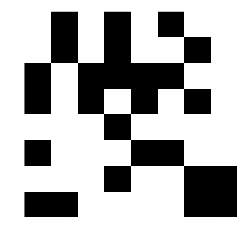

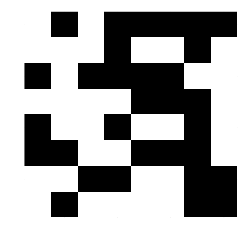

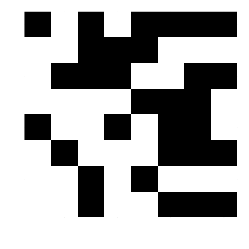

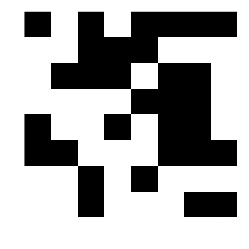

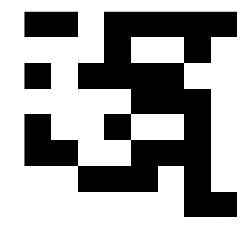

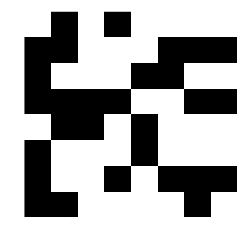

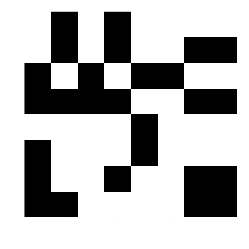

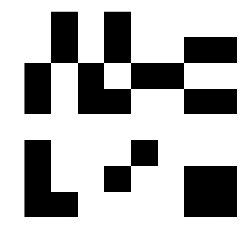

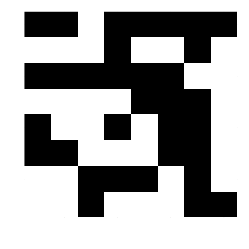

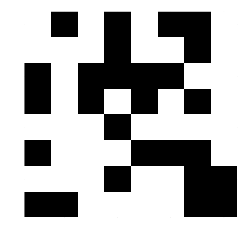

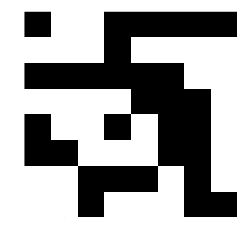

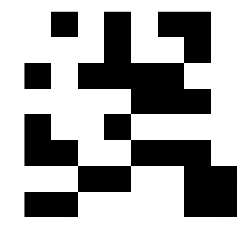

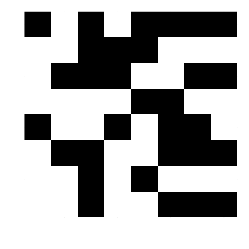

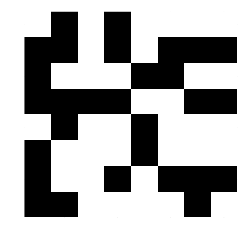

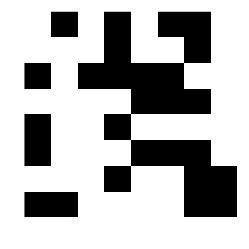

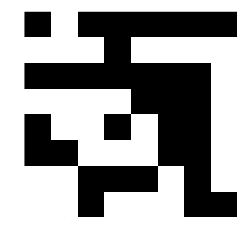

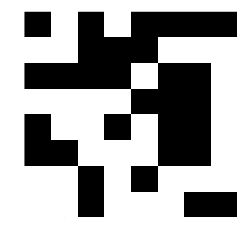

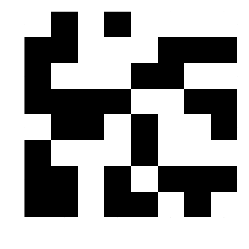

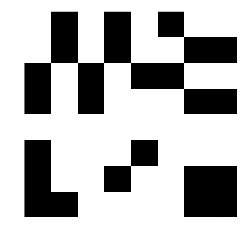

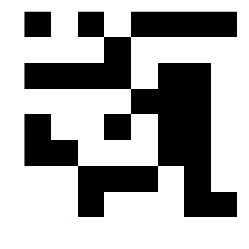

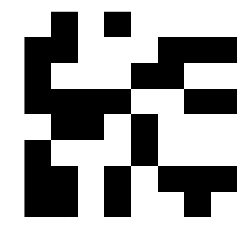

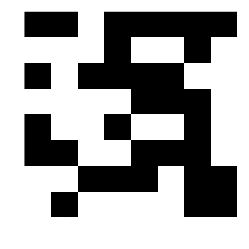

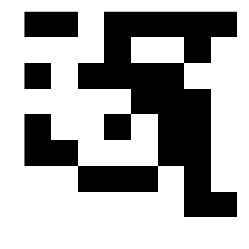

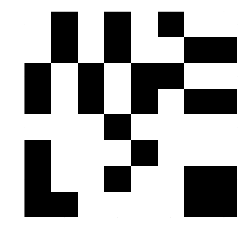

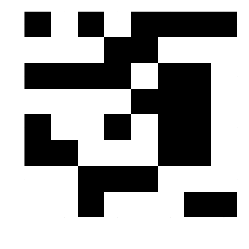

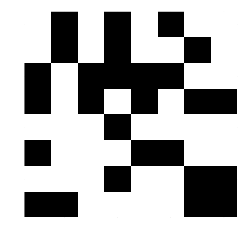

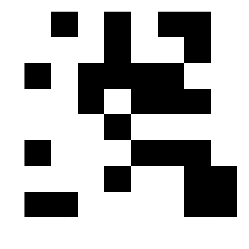

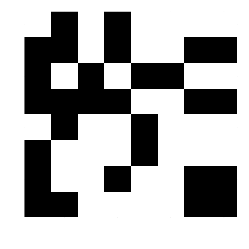

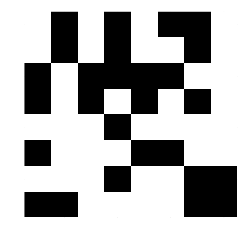

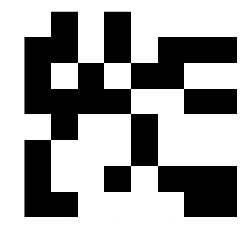

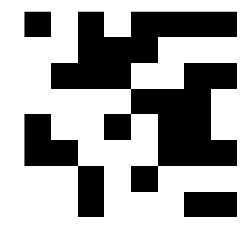

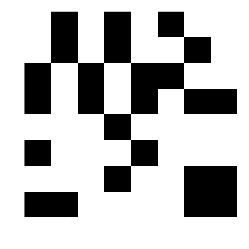

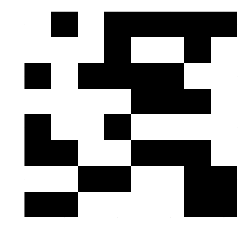

In [55]:
#Running, gives cont and cut. Take lowest cut cont values to see what solutions should be

stuff = HN_cut_plotter_TEST(parameters, res[1], true)

sols = iterative_rotater_list(res[1], stuff[2], 8, false)

for i in sols 
    binary_image_visualizer(reshape(i[1], 8, 8), 250, "hi"; sav = false, d = true)
end

In [283]:
# Encodes objective function to maximize
function objective_func_G(state, images)
    s = 0
    for i in images
        for m in 1:length(state)
            for n in 1:length(state)
                s += state[m] * i[m] * state[n] * i[n]
            end
        end
    end
    return (s * 0.25)
end

objective_func_G (generic function with 1 method)

In [284]:
for i in parameters["images"]
    state = copy(vec(i))
    println(objective_func_G(state,parameters["images"]))
end

64.0
64.0
64.0
64.0
64.0


In [21]:
graph = get_HN_graph(parameters["images"],1.0)
r = iterative_rotater_state(res[1], parameters)
s = []
c_now = 999
for i in r
    c_i = cut(graph, i)
    if c_i < c_now
        c_now = c_i
    end
    #println(c_now)
end

for i in r
    c = cut(graph, i)
    if c == c_now
        push!(s,i)
    end
end

println(s)
for i in s 
    pretty_table(reshape(i[1],8,8))
end

lowest_cut_states(res[1], parameters, disp = true)

Any[(Int8[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1], [-0.9396511444512918, 0.376802459203581, -0.9566791686776273, -0.9592418781438905, 0.2993237446605965, 0.3749446043481317, -0.9470697988607295, 0.36067332068875047, -0.9415340579758573, 0.29803677212436797, 0.3553495497114012, 0.43666260044643135, -1.0, -0.9460689077600262, -0.9509991656686152, 0.4371005830470347, 0.3467261727100164, 0.3199534043956116, 0.32673176089854294, -0.957355051870532, 0.3406441018324853, -0.9604125514814479, -0.9640655335923967, -0.972772766987819, -0.8855355398783324, -0.9478827041985749, 0.40241026378850586, -0.9059770170453985, 0.36476587272333405, -0.9329358059666699, 0.40280349753185307, 0.35637856340322305, 0.37773218907535777, 0.3202607038408951, 0.31706664518337213, -0.983114612240195, 0.37590997893275313, -0.954091433492

2-element Vector{Any}:
 (Int8[1, 1, -1, -1, 1, 1, -1, -1, -1, -1  …  1, 1, 1, 1, -1, -1, 1, 1, -1, -1], [-0.9396511444512918, 0.376802459203581, -0.9566791686776273, -0.9592418781438905, 0.2993237446605965, 0.3749446043481317, -0.9470697988607295, 0.36067332068875047, -0.9415340579758573, 0.29803677212436797  …  -0.9486894276275395, 0.2904740914552746, -0.9851718692420146, 0.35866844246006124, 0.31215489231698923, 0.39527724649826235, -0.9766688324410584, -0.9462110245371282, -0.8709495127187337, 0.40446719943930587])
 (Int8[1, -1, -1, -1, -1, -1, -1, 1, -1, 1  …  1, -1, 1, -1, 1, 1, 1, 1, -1, 1], [-0.23012523590656642, -0.9136716322516936, -0.24715326013290206, -0.2497159695991651, -0.9911503467946783, -0.9155294871071431, -0.2375438903160043, -0.9298007707665241, -0.2320081494311319, -0.9924373193309068  …  -0.23916351908281452, -1.0, -0.2756459606972892, -0.9318056489952136, -0.9783191991382854, -0.8951968449570122, -0.26714292389633343, -0.23668511599240283, -0.16142360417400825, -

In [20]:
function lowest_cut_states(state, params; disp = false)
    graph = get_HN_graph(params["images"],1.0)
    r = iterative_rotater_state(state, parameters)
    s = []
    c_now = 999
    for i in r
        c_i = cut(graph, i)
        if c_i < c_now
            c_now = c_i
        end
    end
    
    for i in r
        c = cut(graph, i)
        if c == c_now
            push!(s,i)
        end
    end

    if disp
        for i in s 
            pretty_table(reshape(i[1],8,8))
        end
    end
    return s
end

lowest_cut_states (generic function with 2 methods)

In [147]:
using PartitioningData
using Random
function generate_unique(N::Int, sample::Vector{Int})
    if length(sample) >= N
        error("Not enough space")
    end
    while true
        s = rand(1:N)
        if !(s in sample)
            return s
        end
    end
end

generate_unique (generic function with 1 method)

In [238]:
sim_time = 8
steps = 3000
im_all = orthogonal_image_generator(64)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:6]
for t in sl
    push!(selected, im_all[t])
end
g = get_HN_graph(selected,1.0)
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]#,(1,2,-1),(3,4,1)]
)
println(parameters["delta"])
@show sl

64
-0.0026666666666666666
sl = [19, 27, 29, 4, 60, 24]


6-element Vector{Int64}:
 19
 27
 29
  4
 60
 24

In [226]:
#=for i in parameters["images"]
    pretty_table(i)
end=#

In [230]:
conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

23
took 2.094194125 seconds


In [242]:
function iterative_rotater_state_test(state, params, debug = false)
    rotations = []
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 1+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,i))
    end
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 3+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,i))
    end
    return rotations
end

iterative_rotater_state_test (generic function with 2 methods)

In [243]:
function HN_cut_plotter_test(params, state)
    rot = [i[2] for i in iterative_rotater_state(state,params)]
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)
    return p
end

HN_cut_plotter_test (generic function with 1 method)

In [239]:
conv = 0
twos = 0 
others = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of convs: $(conv)")
println("Number of twos: $(twos)")
println("Number of more than two sols: $(others)")
println("took $elp seconds")

Number of convs: 99
Number of twos: 85
Number of more than two sols: 0
took 7.966499958 seconds


In [175]:
#WARNING will generate a bunch of .dat files
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
elp = @elapsed begin
    for i in 1:10
        r = HN_Solver_Traj(parameters)
        rs = iterative_rotater_state(r[1], parameters)
        f = false
        for st in rs
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                conv +=1 
                f = true
                break
            end
        end
        if !f
            println("FAILED AT $i")
            save_trajectories(r[2], "8by8_len_6","iter_$i")
            pretty_table(reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FAILED AT 1
File 8by8_len_6_1_iter_1.dat is generated
┌────────┬────────┬────────┬────────┬────────┬────────┬───

In [448]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len8_t02")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len8_t02.dat is generated


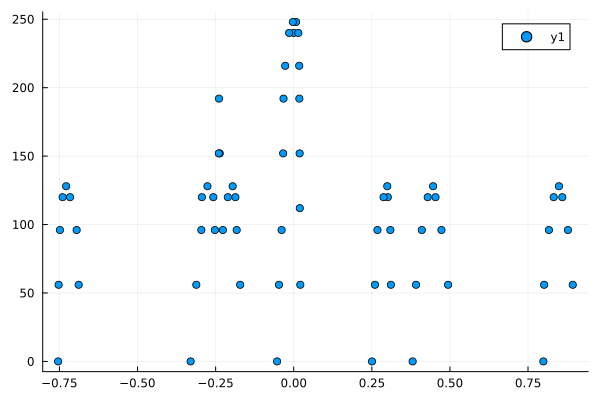

In [431]:
HN_cut_plotter(parameters, res[1])

In [434]:
sol_finder(res[1], parameters)

Any[]

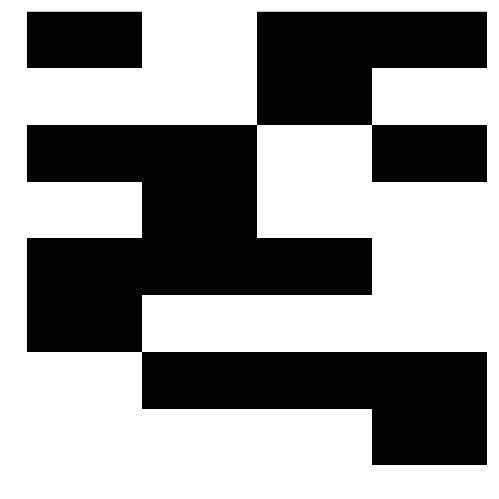

In [465]:
p = heatmap(reshape(res[1][1],8,8);
            # framestyle = :box, # doesn't work
            # framestyle = :none, # no boundary
            legend = false,
            color = cgrad([:black, :white]),
            axis = false,
            size = (500, 500))

# Save the plot to a PNG file
savefig(p, "binary_matrix_large.png")

# Display the plot if running in a script
display(p)

In [26]:
function HN_Solver_Traj_test(parameters::Dict{String, Any}, st, debug::Bool = false)
    # Just gets raw result, no visualizer

    scaling = parameters["scaling"] #Scaling coeff
    S = parameters["images"] # Images
    time_total= parameters["sim_time"] # how long the sim is
    num_steps = parameters["steps"] # number of steps in the sim
    dt_sim = parameters["delta"] # dt
    delta_t = time_total/num_steps
    traj_collection::Vector{Vector{Dice.Hybrid}} = []

    # Make Graph
    graph_set = get_HN_graph(S, scaling)
    
    # Making model
    model = Dice.Model(graph_set, Dice.model_2_hybrid_coupling, delta_t)

    # Making randomized initial state
    num_vertices = Graphs.nv(model.graph)
    
    converged = 0
    diverged = 0


    pinned::Vector{Tuple{Int64, Int8}} = []
    state::Dice.Hybrid = st
    state[2] .+= 0.5
    #println(reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    for stim in parameters["initial_stimuli"]
        # Every n entries is a column, thus taking # of columns and subtracting 1 brings you to where the column begins
        # Adding 1 will bring you to the first entry in the column and so on for +k
        pos = (stim[2]-1) * size(parameters["images"][1],1) + stim[1]
        state[1][pos] = stim[3]
        push!(pinned, (pos, stim[3]))
    end
    #println(state[1]
    traj = Dice.trajectories_pinned(model.graph, num_steps, dt_sim, model.coupling, state, pinned)
    push!(traj_collection, traj)
    # Comment out the other part of the or conditional to ignore negative images
 #=   if (reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        converged += 1
        global sol = state[1]
        break
    end =#

    
    if debug
        pretty_table(reshape(traj[end][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
    return(state,traj_collection)
end    

HN_Solver_Traj_test (generic function with 2 methods)

In [23]:
st = Dice.get_random_hybrid(64, 2.0)

(Int8[-1, -1, 1, -1, -1, -1, -1, 1, -1, 1  …  1, 1, -1, -1, 1, -1, -1, 1, 1, 1], [-0.3287059741954397, -0.3780057111002404, -0.34748580656740313, -0.17089677808717552, -0.444200245270864, 0.33282889825972384, -0.7665692642801463, 0.6850850909324515, 0.29740813433884683, 0.7529336698136366  …  -0.6794923944244309, -0.6763155074668419, 0.9879066773339378, -0.40203652473594786, 0.5368500364484046, 0.9127498384924599, 0.8148660502429199, 0.9318405827000309, 0.45709784853115476, -0.38024118655756367])

In [33]:
#Running
res = HN_Solver_Traj_test(parameters, st, true)
save_trajectories(res[2], "8by8","len16_TEST_NEUTRAL_1")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len16_TEST_NEUTRAL_1.dat is generated


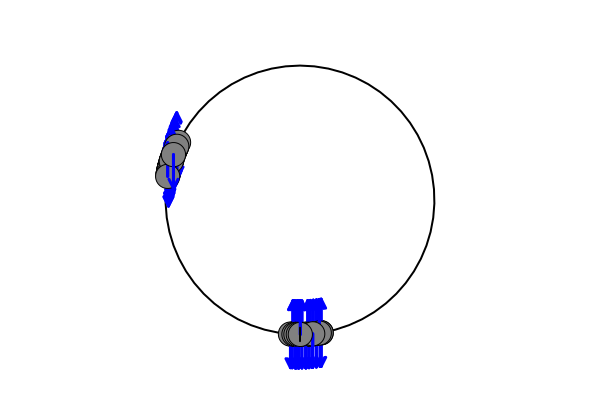

In [25]:
show_state(res[1][1],res[1][2])

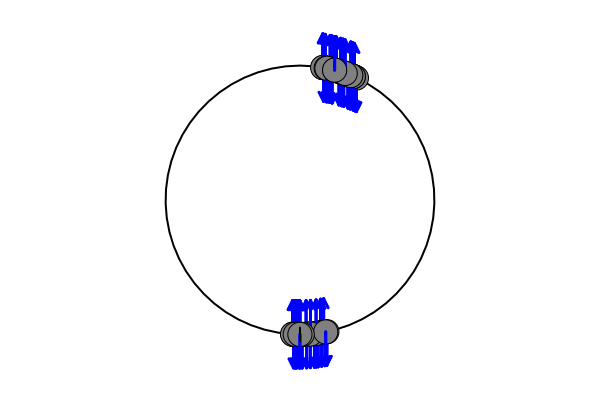

In [34]:
show_state(res[1][1],res[1][2])